In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [25]:
# Load the dataset
data = load_iris()
X = data['data']
y = data['target']

# Convert to binary classification (e.g., classify only classes 0 and 1)
binary_filter = y != 2
X = X[binary_filter]
y = y[binary_filter]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
df.head()  # Shows the first few rows
df.describe()  # Statistical summary

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [27]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [32]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient Descent
        for _ in range(self.n_iters):
            # Linear model: y = w*X + b
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = sigmoid(linear_model)
            
            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]


In [33]:
# Initialize the model
model = LogisticRegression(learning_rate=0.01, n_iters=1000)

# Fit the model
model.fit(X_train, y_train)


In [34]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 100.00%


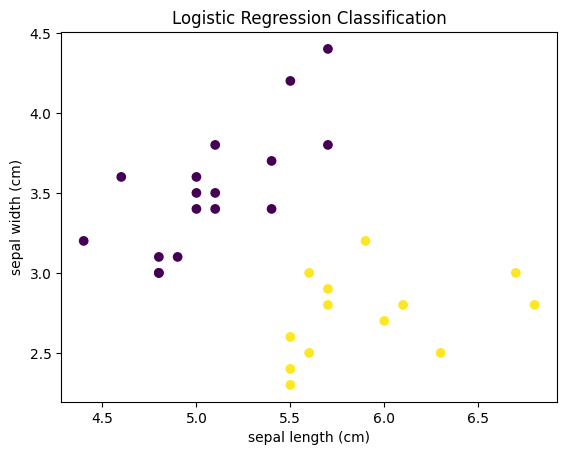

In [35]:
# Visualize classification results (for two features)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis')
plt.xlabel(data['feature_names'][0])
plt.ylabel(data['feature_names'][1])
plt.title('Logistic Regression Classification')
plt.show()